# TensorFlow-Basic-Operation#2

In [1]:
import tensorflow as tf
import numpy as np

## Step6. First Linear Regression with Static Value

In [2]:
x_data = [1, 2, 3]
y_data = [4, 7, 8]

### Cost Function(loss) = 1/m*sum{(h-y)^2}

In [3]:
# h = 2*x + 1
h = tf.constant(2)*x_data + tf.constant(1)

In [4]:
diff = h - y_data

In [5]:
cost = tf.reduce_mean(tf.square(diff))

In [6]:
with tf.Session() as sess:
    print(sess.run(h))
    print(sess.run(diff))
    print(sess.run(cost))

[3 5 7]
[-1 -2 -1]
2


## Step7. Linear Regression with Variable Value

In [7]:
W = tf.Variable(tf.random_uniform([1], -1, 1)) # W : theta
b = tf.Variable(tf.random_uniform([1], -1, 1))

In [8]:
# h = x*theta + b
h = x_data*W + b

In [9]:
diff = h - y_data

In [10]:
cost = tf.reduce_mean(tf.square(diff))

In [11]:
# alpha : learning rates..
alpha = tf.Variable(0.1)

In [12]:
# minimize
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(cost)

In [13]:
init = tf.initialize_all_variables()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20):
        sess.run(train)
        print(step, sess.run(cost), sess.run(W), sess.run(b), sep='\t')

0	1.39876	[ 3.10782671]	[ 0.71630657]
1	0.655735	[ 2.72066569]	[ 0.59658116]
2	0.626935	[ 2.74274516]	[ 0.65566534]
3	0.607613	[ 2.72058344]	[ 0.69410086]
4	0.589305	[ 2.70373178]	[ 0.73371392]
5	0.571869	[ 2.68676305]	[ 0.77214503]
6	0.55526	[ 2.67025948]	[ 0.80967748]
7	0.53944	[ 2.65414643]	[ 0.84630489]
8	0.524373	[ 2.63842106]	[ 0.882052]
9	0.51002	[ 2.62307382]	[ 0.91693985]
10	0.496349	[ 2.60809565]	[ 0.95098901]
11	0.483328	[ 2.59347749]	[ 0.98421961]
12	0.470926	[ 2.57921076]	[ 1.01665139]
13	0.459112	[ 2.56528687]	[ 1.04830348]
14	0.44786	[ 2.55169773]	[ 1.07919466]
15	0.437142	[ 2.53843522]	[ 1.10934329]
16	0.426933	[ 2.52549171]	[ 1.13876724]
17	0.417209	[ 2.51285934]	[ 1.16748381]
18	0.407947	[ 2.50053024]	[ 1.19550991]
19	0.399125	[ 2.48849797]	[ 1.22286248]


### cost 값이 점점 줄어들면서, W와 b 가 어느 값으로 수렴해가는 모습이 보이나요?

## Bonus : matplotlib.pyplot 으로 그래프 그리며 insight 를 얻기 

In [15]:
import matplotlib.pyplot as plt

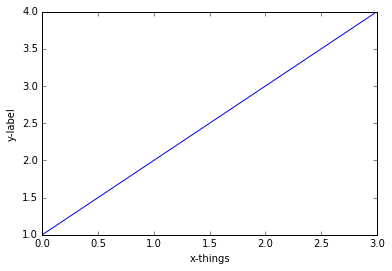

In [16]:
plt.plot([1,2,3,4])
plt.ylabel('y-label')
plt.xlabel('x-things')
plt.show()

### 위에서 작업했던 것에서 cost 값을 그래프로 보면 어떻게 변하는지 확인해봅시다

In [17]:
init = tf.initialize_all_variables()
cost_changes = []
b_changes = []

In [18]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20):
        sess.run(train)
        cost_changes.append(sess.run(cost))
        b_changes.append(sess.run(b))

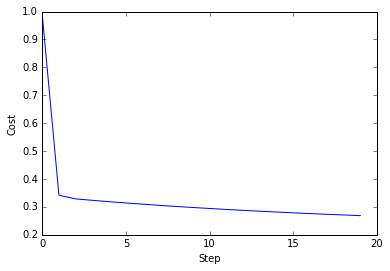

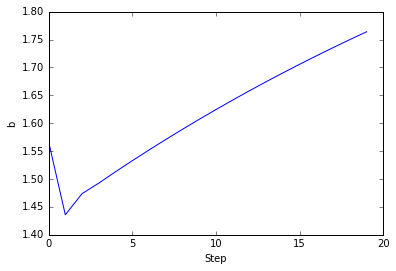

In [19]:
plt.plot(range(20), cost_changes)
plt.ylabel("Cost")
plt.xlabel('Step')
plt.show()

plt.plot(range(20), b_changes)
plt.ylabel("b")
plt.xlabel('Step')
plt.show()

### 자세한 사용법과 응용법은 matplotlib 공식 홈페이지를 참조하면 좋습니다.
* http://matplotlib.org/

## Step8. Placeholder

In [23]:
X = tf.placeholder('float', [2,3])

In [28]:
y = tf.ones([2, 3], 'float')


In [29]:
result = tf.add(X, y)

In [31]:
with tf.Session() as sess:
    print(sess.run(result, feed_dict={X:[[1,2,3], [4,5,6]]}))

[[ 2.  3.  4.]
 [ 5.  6.  7.]]


### 이번엔 빈 공간만 만들어두고, 나중에 feed_dict 를 채워보자

In [32]:
X = tf.placeholder('float', [2,3])
Y = tf.placeholder('float', [2,3])

In [33]:
result = tf.add(X,Y)

In [34]:
with tf.Session() as sess:
    print(sess.run(result, feed_dict={X:[[1,2,3], [4,5,6]], Y:[[10,20,30], [40, 50, 60]]}))

[[ 11.  22.  33.]
 [ 44.  55.  66.]]
